
# Project: Investigate a Dataset (The Movie Database)
# Proccesed by : Mohamed Hamam

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Hint**: In this Project, we'll be analyzing data associated with information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> **Trends**: We'll be interested in the following: 
 <li><a href="#Q1"> Which year has the highest release of movies?</a></li>
 <li><a href="#Q2"> Which Movie has The highest or lowest profit? Top 10 movies which earn highest profit?</a></li>
 <li><a href="#Q3"> Which movie has highest and lowest budget?</a></li>
 <li><a href="#Q4"> What actors are the most appearances?</a></li>
 <li><a href="#Q5"> Which movie get the highest or lowest votes (Ratings)?</a></li>
 <li><a href="#Q6"> Which genre has the highest release of movies? And which genres are most popular from year to year?</a></li>
 <li><a href="#Q7"> Which production company has the most produced movies?</a></li>

In [2]:
# Importing all of the packages that we plan to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

#### It's the time for Gathering, Assessing, and Cleaning the data before we get our Findings

## Loading the Data

In [3]:
## Using Pandas to load all required data
# Loading The Movie Database file
df = pd.read_csv('tmdb-movies.csv')

### Data Assessing
####  It's time to check the data before applying cleaning 

In [4]:
# Assessing The Movie Database file
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [5]:
# Inspecting the Shape of The Movie Database file
df.shape

(10866, 21)

In [6]:
# Inspecting the data types of The Movie Database file
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
# Inspecting the summary of The Movie Database file, including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# Inspecting the the number of unique values in each column of The Movie Database file
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
# Inspecting the descriptive statistics for each column of The Movie Database file
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning
#### After Gathering and Assessing the  data it's time to treat and clean the data to get into our findings

<li><a href="#1"> 1-Filling the non-value items with zero to deal with them later.</a></li>
<li><a href="#2"> 2-Removing the duplicated rows.</a></li>
<li><a href="#3"> 3-Dropping the unnecessary columns.</a></li>
<li><a href="#4"> 4-Dealing with zero itmes.</a></li>
<li><a href="#5"> 5-Dealing with non-values itmes.</a></li>
<li><a href="#6"> 6-Changing format of release date into datetime format.</a></li>
<li><a href="#7"> 7-Adjusting the data types of the dataset.</a></li>

<a id='1'></a>
#### 1-Filling the non-value items with zero to deal with them later.

In [10]:
# Filling the non-value itmes with fillna(0) method
df.fillna(0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,0,Bruce Brown,0,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,0,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,0,Eldar Ryazanov,0,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,0,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


<a id='2'></a>
#### 2-Removing the duplicated rows.

In [11]:
# Checking the duplicated rows
df.duplicated().sum()

1

In [12]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [13]:
# Removing the duplicated rows

In [14]:
df.drop_duplicates(inplace = True)

<a id='3'></a>
#### 3-Dropping the unnecessary columns.

In [15]:
# Checking all colummns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [16]:
# Dropping the unnecessary columns
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'budget', 'revenue'], axis=1, inplace = True)

In [17]:
# Checking the database after dropping unnecessary columns
df.head(1)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='4'></a>
#### 4-Dealing with zero itmes.

In [18]:
# Checking zero values in the database
df.eq(0).sum().sum()

11743

In [19]:
# Checking the rows of zero values
(df == 0).sum()

id                         0
popularity                 0
original_title             0
cast                       0
director                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [20]:
# Dealing with zero itmes
df = df[df['budget_adj'] != 0]
df = df[df['revenue_adj'] != 0]

In [21]:
# Rechecking the rows of zero values
(df == 0).sum()

id                      0
popularity              0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

<a id='5'></a>
#### 5-Dealing with non-values itmes.

In [22]:
# Checking the non-values items
df.isnull().sum()

id                       0
popularity               0
original_title           0
cast                     4
director                 1
overview                 0
runtime                  0
genres                   0
production_companies    46
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

In [23]:
# Checking the rows of non-values items
df[df.isnull().any(axis=1)]

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1758,25183,0.118533,Paper Heart,Michael Cera|Charlyne Yi|Jake Johnson|Gill Sum...,Nicholas Jasenovec,Paper Heart follows Nick and Charlyne on a cro...,88,Comedy|Drama|Romance,NaN,7/31/09,17,5.1,2009,1.016400e+06,1.318242e+06
1797,43937,0.182881,Like Dandelion Dust,Mira Sorvino|Barry Pepper|Cole Hauser|Kate Lev...,Jon Gunn,A compelling drama that explores the different...,100,Drama|Family,NaN,2/5/09,11,7.0,2009,2.541001e+06,3.585962e+05
1800,30128,0.190162,I Hope They Serve Beer in Hell,Matt Czuchry|Jesse Bradford|Marika Dominczyk|T...,Bob Gosse,Tucker decides to take an impromptu trip to ce...,106,Comedy|Drama,NaN,9/25/09,11,5.6,2009,7.114803e+06,1.452740e+06
1871,42151,0.092519,Down Terrace,Robert Hill|Robin Hill|Julia Deakin|David Scha...,Ben Wheatley,After serving jail time for a mysterious crime...,89,Drama|Action|Comedy,NaN,9/1/09,15,6.5,2009,3.170356e+04,1.016400e+04
2303,56812,0.181532,Balada triste de trompeta,Santiago Segura|Antonio de la Torre|RaÃºl ArÃ©...,Ãlex de la Iglesia,"The journey of Javier, the obese Sad Clown, st...",101,Drama|Action|Thriller|Foreign,NaN,12/17/10,44,6.2,2010,7.000000e+06,3.218666e+06
2782,19405,0.501163,Recess: School's Out,Rickey D'Shon Collins|Jason Davis|Ashley Johns...,Chuck Sheetz,Recess: School's Out is a 2001 animated film b...,83,Animation|Comedy|Family,NaN,1/27/01,42,6.5,2001,1.231488e+07,5.475301e+07
2805,50035,0.251798,Lovely & Amazing,Catherine Keener|Brenda Blethyn|Emily Mortimer...,Nicole Holofcener,Self-esteem and insecurity are at the heart of...,91,Comedy|Drama|Romance,NaN,8/31/01,10,6.3,2001,3.078720e+05,5.156156e+06
2840,18734,0.185009,L.I.E. Long Island Expressway,Paul Dano|Bruce Altman|Brian Cox|Billy Kay|Jam...,Michael Cuesta,In this biting and disturbing coming-of-age ta...,97,Drama,NaN,1/20/01,13,5.2,2001,8.620417e+05,2.053127e+06
3047,13827,0.518011,"Surfer, Dude",Matthew McConaughey|Jeffrey Nordling|Willie Ne...,S.R. Bindler,A wave twisting tale of a soul searching surfe...,85,Comedy,NaN,9/5/08,13,5.0,2008,6.076720e+06,7.038563e+04
3077,10188,0.451304,The Sisterhood of the Traveling Pants 2,Alexis Bledel|Amber Tamblyn|America Ferrera|Bl...,Sanaa Hamri,Four young women continue the journey toward a...,117,Adventure|Comedy|Drama|Family,NaN,8/6/08,127,6.0,2008,2.734524e+07,4.491954e+07


In [24]:
# Dealing with rows of non-valus itmes
df.fillna('None', axis=1, inplace = True)

In [25]:
# Rechecking the non-values items
df.isnull().sum()

id                      0
popularity              0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

<a id='6'></a>
### 6-Changing format of release date into datetime format.

In [26]:
# Change time format from month/day/year to month-day-year
df['release_date'] = df['release_date'].str.replace('/', '-')
df['release_date']

0          6-9-15
1         5-13-15
2         3-18-15
3        12-15-15
4          4-1-15
           ...   
10822     6-21-66
10828     7-13-66
10829    12-17-66
10835    12-20-66
10848     8-24-66
Name: release_date, Length: 3854, dtype: object

In [27]:
# Convert release_date column to date time using to_datetime method
df['release_date'] = pd.to_datetime(df['release_date'], format='%m-%d-%y')
df.loc[df['release_date'].dt.year >= 2016, 'release_date'] -= pd.DateOffset(years=100)

In [28]:
# Check release_date column after converting
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10822   1966-06-21
10828   1966-07-13
10829   1966-12-17
10835   1966-12-20
10848   1966-08-24
Name: release_date, Length: 3854, dtype: datetime64[ns]

In [29]:
# Checking the df after release_date column is converted to datetime
df.head(1)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.280026,1392445892.5238


<a id='7'></a>
### 7-Adjusting the data types of the dataset.

In [30]:
# Checking the data types of the dataset.
df.dtypes

id                              object
popularity                      object
original_title                  object
cast                            object
director                        object
overview                        object
runtime                         object
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                      object
vote_average                    object
release_year                    object
budget_adj                      object
revenue_adj                     object
dtype: object

In [31]:
# Changing the next mentioned columns from object to integer
df['id'] = df['id'].astype(int)
df['runtime'] = df['runtime'].astype(int)

In [32]:
# Changing the next mentioned columns from object to float
df['popularity'] = df['popularity'].astype(float)
df['budget_adj'] = df['budget_adj'].astype(float)
df['revenue_adj'] = df['revenue_adj'].astype(float)
df['vote_count'] = df['vote_count'].astype(float)
df['vote_average'] = df['vote_average'].astype(float)

In [33]:
# ReCheck the data types of the dataset.
df.dtypes

id                               int32
popularity                     float64
original_title                  object
cast                            object
director                        object
overview                        object
runtime                          int32
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                     float64
vote_average                   float64
release_year                    object
budget_adj                     float64
revenue_adj                    float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis
>  After wrangling the data,  it's time for answering the most common questions through Exploratory Data Analysis

<a id='Q1'></a> 
### Question 1 (Which year has the highest release of movies?)
> It's a common question to answer, what is the year that has the highest release of movies?
> For movie fans the year has the most released movies is the memorable year and the passional year, more movies are more passionate.

In [34]:
# Loading TMDB to answer the question
df.head(1)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562.0,6.5,2015,1.379999e+08,1.392446e+09


### First, we're going to describe the variables and checking its distribution.

In [48]:
# Describe the data of Movie Released VS Year
x = df['release_year'].min()
y = df['release_year'].max()
z = df['release_year'].mode()
print('The min year is {}, the max year is {} and the mode year is {}'.format(x, y, z[0]))

The min year is 1960, the max year is 2015 and the mode year is 2011


#### As we can see in the above-descriptive statistics, the first year in this dataset is 1960, the last year is 2015, and the  mode is 2011.

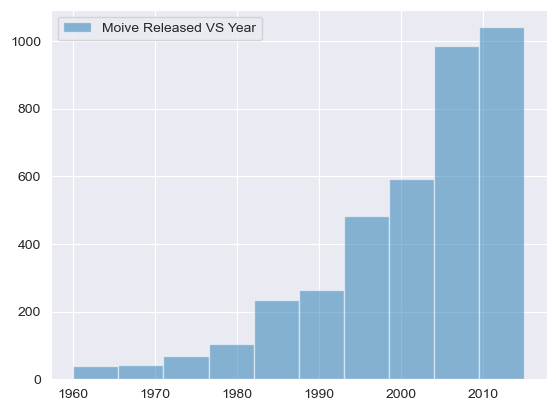

In [49]:
# Checking the distribution of Movie Released VS Year
df['release_year'].hist(alpha=0.5, label= "Moive Released VS Year");
plt.legend();

#### The above graph describes the distribution for Movie Released VS Year

### Second, Visualization of Data Analysis

In [50]:
# Get the top 5 years that they've the most released movies
df_released_movies = df.groupby(df['release_year']).count()['id']
df_released_movies.nlargest(n=5)

release_year
2011    199
2013    180
2010    178
2009    174
2006    169
Name: id, dtype: int64

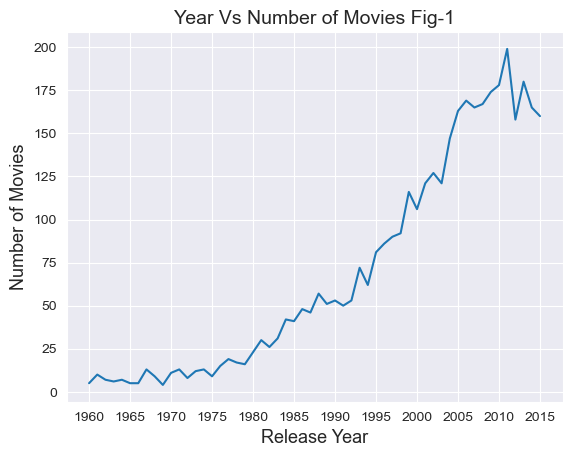

In [51]:
# Data Visualization
df_released_movies.plot(xticks = np.arange(1960,2016,step = 5));
sns.set(rc={'figure.figsize':(10,5)});
plt.title('Year Vs Number of Movies Fig-1', fontsize = 14);
plt.xlabel('Release Year', fontsize = 13);
plt.ylabel('Number of Movies', fontsize = 13);

### The figure shows the distribution of the Released year over Number of movies
> As we've figured the period from 2009 to 2011 have the most number of movies.

<a id='Q2'></a> 
### Question 2 (Which Movie has The highest or lowest profit? Top 10 movies which earn highest profit?)
> What is the purpose of production for any movie?
> The main purpose of a production company or an individual producer is about to get profit, so the question of which movie has the highest profit is too logical to answer.

In [52]:
# Loading TMDB to answer the question
df.head(1)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562.0,6.5,2015,1.379999e+08,1.392446e+09


In [53]:
# Getting the profit column
df['profit'] = df['revenue_adj'] - df['budget_adj']
df['profit']

0        1.254446e+09
1        2.101614e+08
2        1.704191e+08
3        1.718723e+09
4        1.210949e+09
             ...     
10822    1.762585e+08
10828    6.718015e+07
10829    9.049166e+06
10835    5.374412e+07
10848    4.625353e+07
Name: profit, Length: 3854, dtype: float64

### First, we're going to describe the variables and checking its distribution.

In [54]:
# Describe the data of the profit column
df['profit'].describe()

count    3.854000e+03
mean     9.282470e+07
std      1.940715e+08
min     -4.139124e+08
25%     -1.504995e+06
50%      2.737064e+07
75%      1.074548e+08
max      2.750137e+09
Name: profit, dtype: float64

#### As we see in the above-descriptive statistics, the maximum profit in this dataset is 2.750137e+09, the minimum loss in this dataset is -4.139124e+08, and we have movies that had a profit in the quarters 50 and 75 % and we have movies had a loss in the quarter of 25%.

### Second, Visualization of Data Analysis

In [55]:
# Getting the top 10 movies that had the best profit
top_10_profit = df.groupby(df['original_title']).sum()['profit']
top_10_profit.nlargest(n=10)

original_title
Star Wars                         2.750137e+09
Avatar                            2.586237e+09
Titanic                           2.234714e+09
The Exorcist                      2.128036e+09
Jaws                              1.878643e+09
E.T. the Extra-Terrestrial        1.767968e+09
Star Wars: The Force Awakens      1.718723e+09
The Net                           1.551568e+09
One Hundred and One Dalmatians    1.545635e+09
The Empire Strikes Back           1.376998e+09
Name: profit, dtype: float64

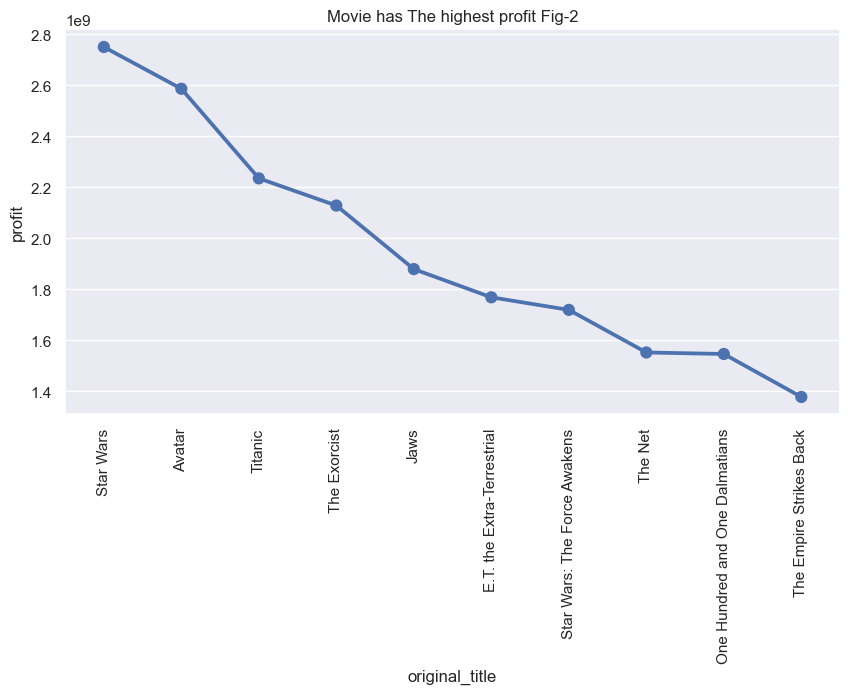

In [56]:
# Visualizing the data of the highest-profit movies
index = top_10_profit.nlargest(n=10).index
values = top_10_profit.nlargest(n=10);
plt.title('Movie has The highest profit Fig-2');
plt.xlabel('Movie Name');
plt.ylabel('Profit Net');
sns.pointplot(x=index,y=values);
plt.xticks(rotation=90);

### The figure shows the highest profit
> As we've figured the movie that had the most profit is Star Wars and the next one is Avatar and so on.

In [60]:
# Getting the top 10 movies that had the lowest profit
smallest_10 = top_10_profit.nsmallest(n=10)
smallest_10

original_title
The Warrior's Way              -4.139124e+08
The Lone Ranger                -1.551102e+08
The Alamo                      -1.375868e+08
The 13th Warrior               -1.286813e+08
Brother Bear                   -1.185350e+08
Cutthroat Island               -1.137371e+08
The Adventures of Pluto Nash   -1.126143e+08
Mars Needs Moms                -1.076102e+08
Heaven's Gate                  -1.072059e+08
Supernova                      -9.518961e+07
Name: profit, dtype: float64

In [61]:
# Getting the index of the top 10 movies that had the lowest profit
smallest_10.index

Index(['The Warrior's Way', 'The Lone Ranger', 'The Alamo', 'The 13th Warrior',
       'Brother Bear', 'Cutthroat Island', 'The Adventures of Pluto Nash',
       'Mars Needs Moms', 'Heaven's Gate', 'Supernova'],
      dtype='object', name='original_title')

In [62]:
# Checking the rows of the 10 movies that had the lowest profit
df.loc[df['original_title'].isin(['The Warrior\'s Way', 'The Lone Ranger', 'The Alamo', 'The 13th Warrior',
       'Brother Bear', 'Cutthroat Island', 'The Adventures of Pluto Nash',
       'Mars Needs Moms', 'Heaven\'s Gate', 'Supernova'])]

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,46528,0.250540,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74.0,6.4,2010,4.250000e+08,1.108757e+07,-4.139124e+08
2435,1911,1.189386,The 13th Warrior,Antonio Banderas|Vladimir Kulich|Dennis StorhÃ...,John McTiernan,"In AD 922, Arab courtier, Ahmad Ibn Fadlan acc...",102,Adventure|Fantasy|Action,Touchstone Pictures,1999-08-27,275.0,6.2,1999,2.094485e+08,8.076712e+07,-1.286813e+08
3484,50321,0.921653,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,Simon Wells,"When Martians suddenly abduct his mom, mischie...",88,Adventure|Animation|Family,Walt Disney Animation Studios,2011-03-09,129.0,5.5,2011,1.454097e+08,3.779950e+07,-1.076102e+08
4078,11692,0.912373,The Adventures of Pluto Nash,Eddie Murphy|Randy Quaid|Rosario Dawson|Joe Pa...,Ron Underwood,"The year is 2087, the setting is the moon. Edd...",95,Action|Comedy|Science Fiction,Village Roadshow Pictures|Castle Rock Entertai...,2002-08-15,75.0,4.6,2002,1.212261e+08,8.611872e+06,-1.126143e+08
4970,10009,1.653031,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,Aaron Blaise|Robert Walker,When a young Inuit hunter needlessly kills a b...,85,Animation|Adventure|Family|Fantasy,Walt Disney Pictures|Walt Disney Feature Anima...,2003-10-20,753.0,6.8,2003,1.185353e+08,2.963382e+02,-1.185350e+08
5508,57201,1.214510,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,1607.0,6.0,2013,2.386885e+08,8.357833e+07,-1.551102e+08
7031,10733,0.948560,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,Based on the 1836 standoff between a group of ...,137,Western|History|War,Imagine Entertainment|Touchstone Pictures,2004-04-07,60.0,5.9,2004,1.673946e+08,2.980774e+07,-1.375868e+08
7332,10935,0.418950,Heaven's Gate,Kris Kristofferson|Christopher Walken|John Hur...,Michael Cimino,Harvard graduate James Averill (Kris Kristoffe...,219,Action|Drama|History|Western,United Artists,1980-11-19,18.0,6.0,1980,1.164256e+08,9.219668e+06,-1.072059e+08
8102,1408,0.981049,Cutthroat Island,Geena Davis|Matthew Modine|Frank Langella|Maur...,Renny Harlin,"Morgan Adams and her slave, William Shaw, are ...",119,Action|Adventure,Le Studio Canal+|Laurence Mark Productions|Met...,1995-12-22,54.0,6.1,1995,1.402348e+08,2.649767e+07,-1.137371e+08
8765,10384,0.385350,Supernova,James Spader|Angela Bassett|Robert Forster|Lou...,Walter Hill|Jack Sholder,"Set in the 22nd century, when a battered salva...",91,Science Fiction,United Artists|Metro-Goldwyn-Mayer (MGM)|Hamme...,2000-01-14,42.0,4.7,2000,1.139663e+08,1.877668e+07,-9.518961e+07


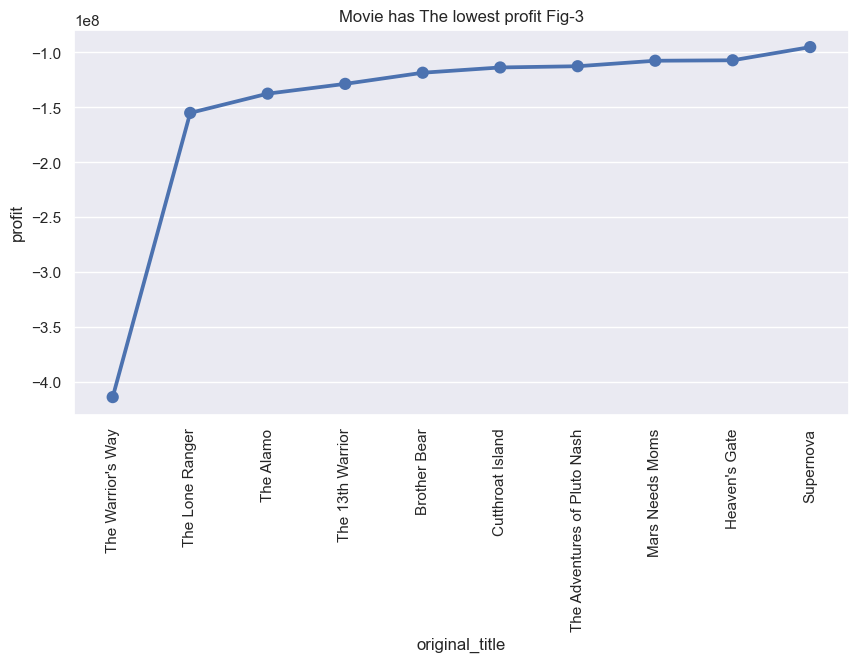

In [63]:
# Visualizing the data of the lowest-profit movies
index = smallest_10.index;
values = smallest_10;
plt.title('Movie has The lowest profit Fig-3');
plt.xlabel('Movie Name');
plt.ylabel('Profit Net');
sns.pointplot(x=index,y=values);
plt.xticks(rotation=90);

### The figure shows the lowest profit
> As we've figured the movie that had the most loss is The Warrior's Way and the next one is The Lone Ranger and so on.

<a id='Q3'></a> 
### Question 3 (Which movie has highest and lowest budget?)
>We're going to answer the question of which movie has the highest or lowest budget.The movie has a high budget is an indicator of popularity to the audience before the launch of the movie.

In [64]:
# Loading TMDB to answer the question
df.head(1)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562.0,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


### First, we're going to describe the variables and checking its distribution.

In [65]:
# Describe the data of the budget column
df['budget_adj'].describe()

count    3.854000e+03
mean     4.423999e+07
std      4.480925e+07
min      9.693980e-01
25%      1.309053e+07
50%      3.001611e+07
75%      6.061307e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

#### As we see in the above-descriptive statistics, the maximum budget in this dataset is 4.250000e+08, the minimum budget in this dataset is 9.693980e-01, and we have movies that had a high budget in the quarters 50 and 75 % and we have movies had a low budget in the quarter of 25%.

### Second, Visualization of Data Analysis

In [66]:
# Getting the movies that had the largest budget
top_budget = df.groupby(['original_title'])['budget_adj'].sum()
top_budget

original_title
(500) Days of Summer          7.623003e+06
10 Things I Hate About You    2.094485e+07
10,000 BC                     1.063426e+08
101 Dalmatians                7.507170e+07
102 Dalmatians                1.076348e+08
                                  ...     
xXx: State of the Union       9.714101e+07
Ã†on Flux                     6.922692e+07
Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´          2.808100e+07
ÐÐ´Ð¼Ð¸Ñ€Ð°Ð»ÑŠ               2.025573e+06
ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰         1.154445e+07
Name: budget_adj, Length: 3808, dtype: float64

In [67]:
# Getting the top 10 movies that had the largest budget
top_budget.nlargest(n=10)

original_title
The Warrior's Way                              4.250000e+08
Pirates of the Caribbean: On Stranger Tides    3.683713e+08
King Kong                                      3.230894e+08
Godzilla                                       3.212750e+08
Pirates of the Caribbean: At World's End       3.155006e+08
Superman Returns                               2.920507e+08
The Avengers                                   2.892055e+08
Robin Hood                                     2.736674e+08
Titanic                                        2.716921e+08
Spider-Man 3                                   2.713305e+08
Name: budget_adj, dtype: float64

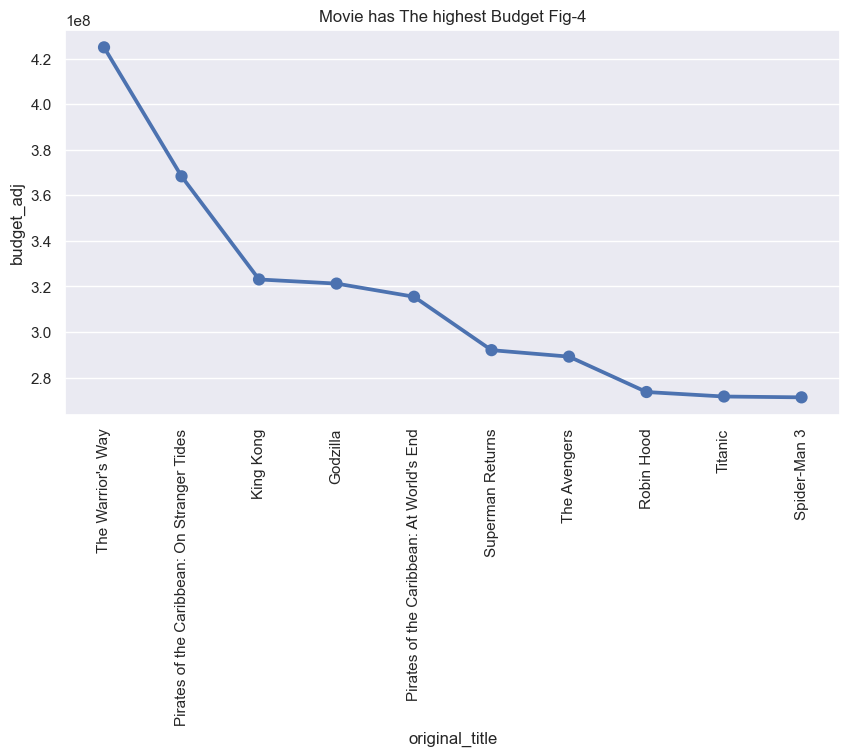

In [68]:
# Visualizing the data of the highest-budget movies
index = top_budget.nlargest(n=10).index
values = top_budget.nlargest(n=10);
plt.title('Movie has The highest Budget Fig-4');
plt.xlabel('Movie Name');
plt.ylabel('Movie Budget');
sns.pointplot(x=index,y=values);
plt.xticks(rotation=90);

### The figure shows the largest budget
> As we've figured the movie that had the higher budget is The Warrior's Way and the next one is Pirates of the caribbean and so on.

<a id='Q4'></a> 
### Question 4 (What actors are the most appearances?)
>This one is for the actor's fans, the records lovers. What is the actor who has the most appearances?

In [69]:
# Loading TMDB to answer the question
df.head(1)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562.0,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


### First, we're going to describe the variables and checking its distribution.

In [70]:
# Making a function will split the string and return the count of each actor.
def count_cast(x):
    #concatenate all the rows of the column.
    data_actor = df[x].str.cat(sep = '|')
    data_actor = pd.Series(data_actor.split('|'))
    #counts each value of the column and return.
    Count_actor = data_actor.value_counts(ascending=False)
    return Count_actor
print(count_cast('cast'))

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
                     ..
Zoe Aggeliki          1
Jan Broberg           1
Matt Bush             1
Katrina Bowden        1
Raquel Welch          1
Length: 6840, dtype: int64


### Second, Visualization of Data Analysis

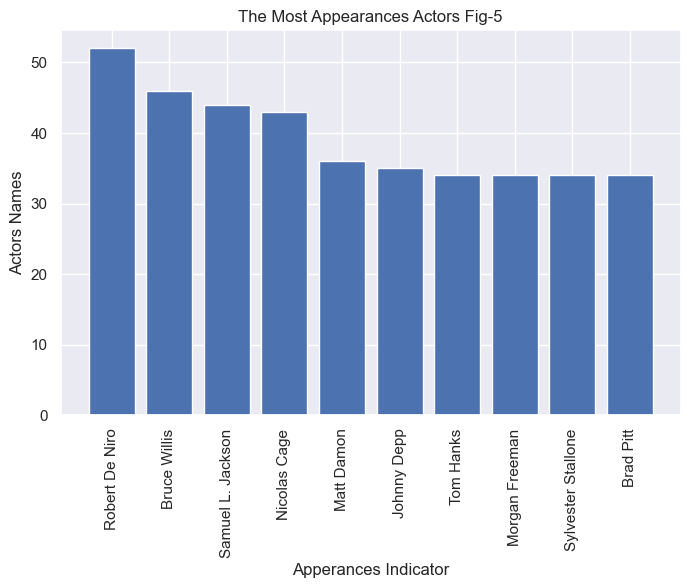

In [71]:
# Visualizing the data of the most appearances actors
index = count_cast('cast').index[:10]
values = count_cast('cast')[index]
plt.subplots(figsize= (8,5))
plt.bar(index ,values);
plt.title('The Most Appearances Actors Fig-5')
plt.ylabel('Actors Names')
plt.xlabel('Apperances Indicator')
plt.xticks(rotation=90)
plt.show()

### The figure shows the most appearance actors
> As we've figured the most appearance actor is Robert De Niro and the next one is Bruce Willis and so on.

<a id='Q5'></a> 
### Question 5 (Which movie get the highest or lowest votes (Ratings)?)
>Rating is a positive indicator of the quality of the movie. So it's a nice choice to ask and answer a question like this.

In [73]:
# Loading TMDB to answer the question
df.head(1)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562.0,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


### First, we're going to describe the variables and checking its distribution.

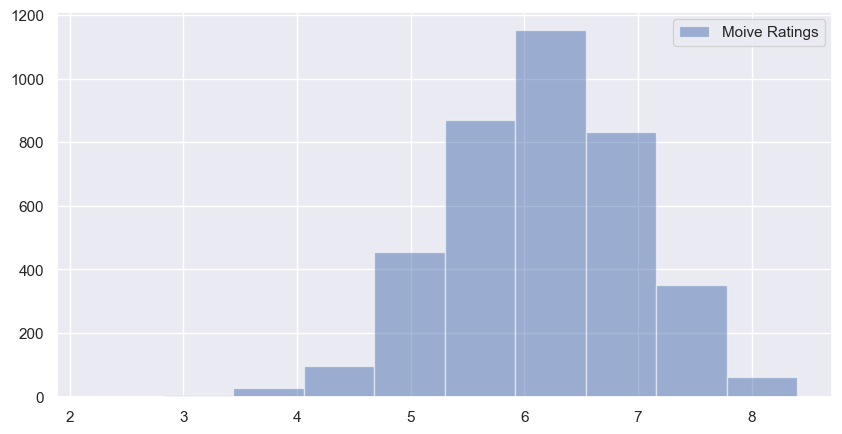

In [74]:
# Checking the distribution of Movie Ratings
df['vote_average'].hist(alpha=0.5, label= "Moive Ratings");
plt.legend();

#### The above graph describes the statistics of Movie Ratings, as we observed the average rating is within range 6, the max rating is 8.5 aprrox and the min rating is 3.5 approx.

### Second, Visualization of Data Analysis

In [75]:
# Getting the movies rating
movie_rating = pd.DataFrame(df['vote_average'].sort_values(ascending = False))
movie_rating

,vote_average
4178,8.4
7948,8.4
7269,8.3
650,8.2
4179,8.1
...,...
7526,3.4
3134,3.3
4540,3.3
4115,3.3


In [76]:
# Getting the 10 movies that had the most rating
movie_rating['original_title'] = df['original_title']
movie_rating['original_title'][:10]
movie_rating[:10]

,vote_average,original_title
4178,8.4,The Shawshank Redemption
7948,8.4,Stop Making Sense
7269,8.3,The Godfather
650,8.2,Whiplash
4179,8.1,Forrest Gump
10222,8.1,Schindler's List
2875,8.1,The Dark Knight
4177,8.1,Pulp Fiction
2409,8.1,Fight Club
9758,8.1,The Godfather: Part II


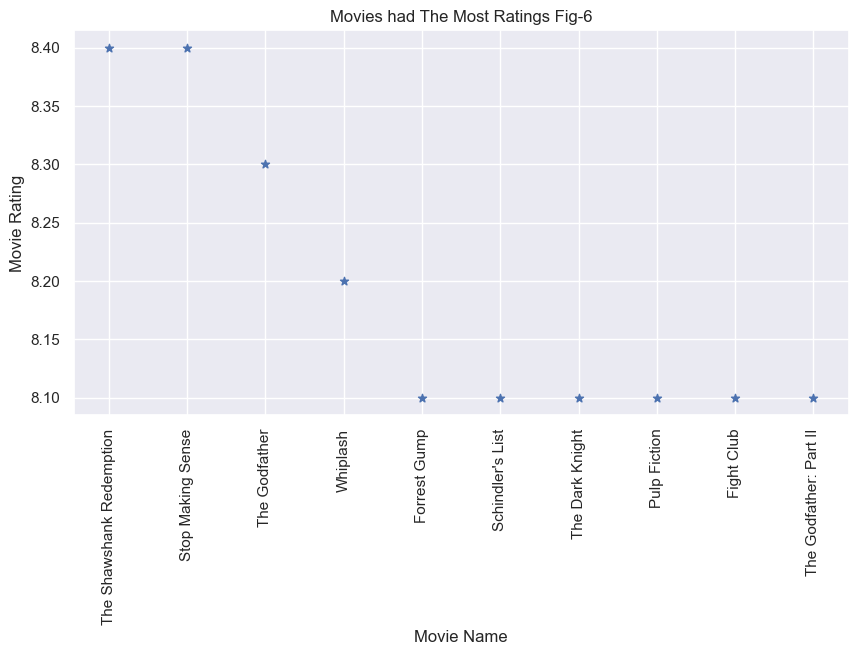

In [77]:
# Visualizing the data of the highest-budget movies
index = movie_rating[:10]['original_title'];
values = movie_rating[:10]['vote_average'];
plt.scatter(index, values, marker='*');
plt.title('Movies had The Most Ratings Fig-6');
plt.xlabel('Movie Name');
plt.ylabel('Movie Rating');
plt.xticks(rotation=90);

### The figure shows the movies had the most ratings
> As we've figured the movie has the most rating is The Shawshank Redemption and the next one is Shop Making Sense and so on.

<a id='Q6'></a> 
### Question 6 (Which genre has the highest release of movies?
> We're going to discover the genre of movies that have the highest release so, thus the most popular category.

In [78]:
# Loading TMDB to answer the question
df.head(1)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562.0,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


### First, we're going to describe the variables and checking its distribution.

In [79]:
# Making a function will split the string and return the name of each genre.
def count_genres(x):
    #concatenate all the rows of the column.
    data_genre = df[x].str.cat(sep = '|')
    data_genre = pd.Series(data_genre.split('|'))
#counts each value of the column and return.
    count_genre = data_genre.value_counts(ascending=False)
    return count_genre
print(count_genres('genres'))

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64


### Second, Visualization of Data Analysis

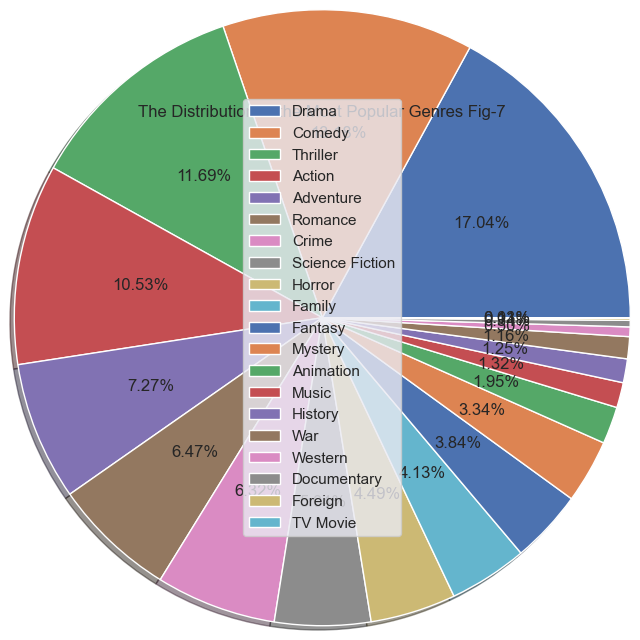

In [80]:
# Visualizing the data of the most popular genres
plt.title("The Distribution of the Most Popular Genres Fig-7", loc = 'center')
plt.pie(count_genres('genres'), autopct='%1.2f%%', shadow=True, radius=2)
plt.legend(count_genres('genres').index, loc="center")
plt.show()

### The figure shows the most popular genres
> As we've figured that the most popular genre is Drama and the next one is Comedy and so on.

<a id='Q7'></a> 
### Question 7 (Which production company has the most produced movies?)
> We're going to answer this question cause might the companies that produced more movies had an indicator that their movies are more successful.

In [81]:
# Loading TMDB to answer the question
df.head(1)

,id,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562.0,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


### First, we're going to describe the variables and checking its distribution.

In [82]:
# Making a function will split the string and return the name of each company.
def count_company(x):
    #concatenate all the rows of the column.
    data_co = df[x].str.cat(sep = '|')
    data_co = pd.Series(data_co.split('|'))
#counts each value of the column and return.
    count_co = data_co.value_counts(ascending=False)
    return count_co
print(count_company('production_companies'))

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
                                         ... 
Sanctum Australia                           1
Great Wight Productions/ Osford Films       1
Millbrook Pictures                          1
Lago Film                                   1
Chenault Productions                        1
Length: 3266, dtype: int64


### Second, Visualization of Data Analysis

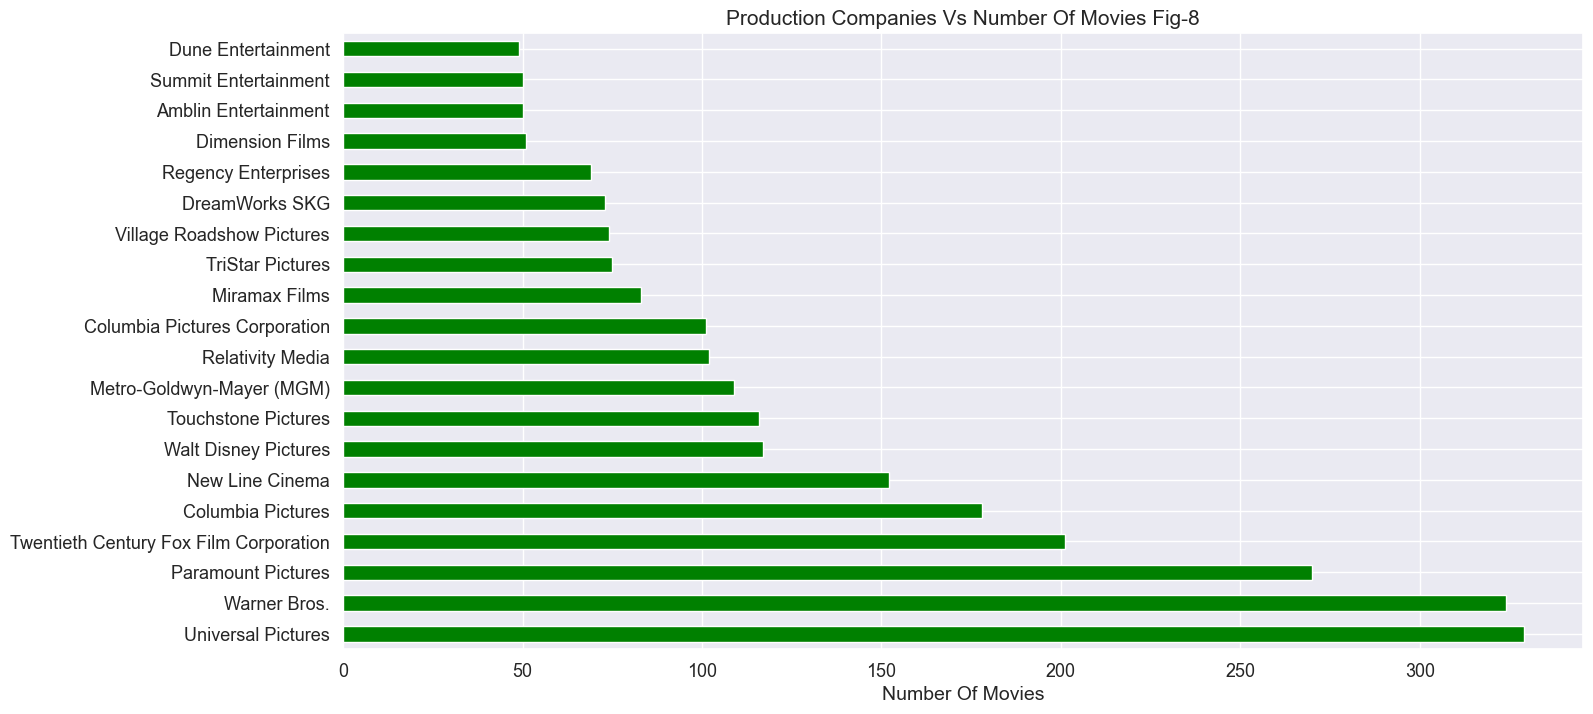

In [83]:
# Visualizing the data of the most production companies
count_company('production_companies').iloc[:20].plot(kind='barh',figsize=(16,8), colormap='ocean', fontsize=13)
plt.title("Production Companies Vs Number Of Movies Fig-8",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=14)
sns.set_style("whitegrid")

### The figure shows the most production companies
> As we've figured that the most production company is Universal Pictures and the next one is Warner Bros and so on.

<a id='conclusions'></a>
## Conclusions

<br><li> 2014 is the year has the maximum number of movies in this database.
<br><li> Star Wars, Avatar and Titanic are the most profitable movies.
<br><li> The Warrior's Way, The Lone Ranger and The Alamo are the most loss movies.
<br><li> The Warrior's Way, Pirates of the Caribbean: On Stranger Tides and King Kong are the most budget movies.
<br><li> Robert De Niro, Bruce Willis, and Samuel L. Jackson are the most appearances actors.
<br><li> The Shawshank Redemption, Stop Making Sense, and The Godfather are the most-rated movies.
<br><li> Drame, Comedy, Thriller, and Action are the most-made genres. 
<br><li> Universal Pictures, Warner Bros, and Paramount Pictures are tho most earned production companies.